In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [2]:
df = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day2/Cancer/Cancer.csv")

dum_cancer = pd.get_dummies(df, drop_first = True)

dum_cancer.drop('subjid', axis = 1, inplace = True)

dum_cancer

,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_10 to 14,tumor-size_15 to 19,tumor-size_20 to 24,...,node-caps_yes,deg-malig_three,deg-malig_two,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes,Class_recurrence-events
0,False,True,False,False,False,False,True,False,True,False,...,True,True,False,True,False,True,False,False,False,True
1,False,False,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
3,False,True,False,False,False,False,True,False,False,False,...,True,True,False,True,True,False,False,False,True,False
4,False,True,False,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,False,False,True,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False
282,False,False,True,False,False,False,True,False,False,False,...,True,False,True,False,True,False,False,False,True,False
283,True,False,False,False,False,False,True,False,False,False,...,True,False,True,True,False,False,False,True,False,False
284,False,False,True,False,False,False,True,False,True,False,...,False,False,True,True,True,False,False,False,False,False


In [3]:
y = dum_cancer["Class_recurrence-events"]
X = dum_cancer.drop("Class_recurrence-events", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=24, stratify=y)

bernoulli = BernoulliNB()
bernoulli.fit(X_train, y_train)
y_pred = bernoulli.predict(X_test)
y_pred_prob = bernoulli.predict_proba(X_test)

print(accuracy_score(y_test, y_pred))

0.7790697674418605


In [20]:
y_probs = bernoulli.predict_proba(X_test)
y_pred_prob = y_probs[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

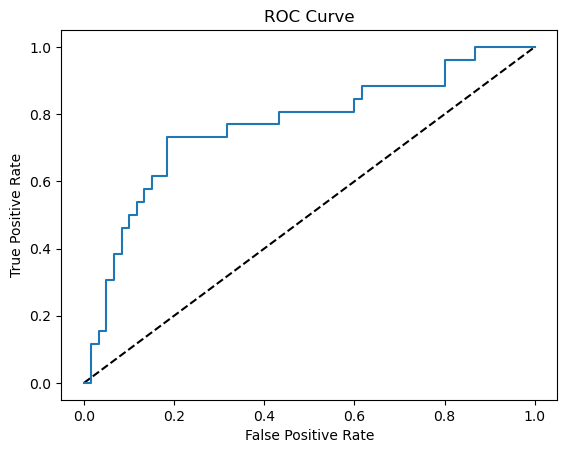

0.7666666666666666


In [11]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(roc_auc_score(y_test, y_pred_prob))


In [18]:

kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state=24)
result = cross_val_score(bernoulli, X, y, cv = kfold, scoring = 'neg_log_loss')
print(result)
print(result.mean())

print(roc_auc_score(y_test, y_pred_prob))
print(log_loss(y_test,y_pred_prob))

[-0.50262491 -0.62897033 -0.65203013 -0.53900814 -0.74360004]
-0.6132467093440803
0.7666666666666666
0.5623030780834444
